# Project 5: Team Mobile Madness

_By: Jin Park_

---
### Project 5 Objectives
 
- This group hackathon, a scenario that pretends the group is in the data science department of a mobile device company to find out which customers are likely to "churn" with a limited time..
- Identify behaviors strongly correlated with churn in this dataset.
- Build models to predict the churn rate.

---
### Project 5 Guide

- [Imports](#Imports)
- [Data Cleaning and EDA](#Data Cleaning and EDA)
- [Modeling](#Modeling)
    - [Baseline](#Baseline)
    - [Logistic Regression](#Logistic Regression)
    - [Random Forest Classifier](#Random Forest Classifier)
    - [Feature Importances](#Feature Importances)

<a id='Imports'></a>
# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
df = pd.read_csv("../datasets/churn-bigml-20.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


<a id='Data Cleaning and EDA'></a>
# Data Cleaning and EDA

In [3]:
# Check the value counts of "Churn" 
df['Churn'].value_counts()

False    572
True      95
Name: Churn, dtype: int64

In [4]:
# Convert all binary data that are in string format to a numerical value 1 or 0
df['Churn'] = [1 if i == True else 0 for i in df['Churn']]
df['International plan'] = [1 if i == 'Yes' else 0 for i in df['International plan']]
df['Voice mail plan'] = [1 if i == 'Yes' else 0 for i in df['Voice mail plan']]

In [5]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [6]:
# Check the value counts of Customer service calls.
df['Customer service calls'].value_counts()

1    236
2    151
0    142
3     81
4     33
5     17
6      5
8      1
7      1
Name: Customer service calls, dtype: int64

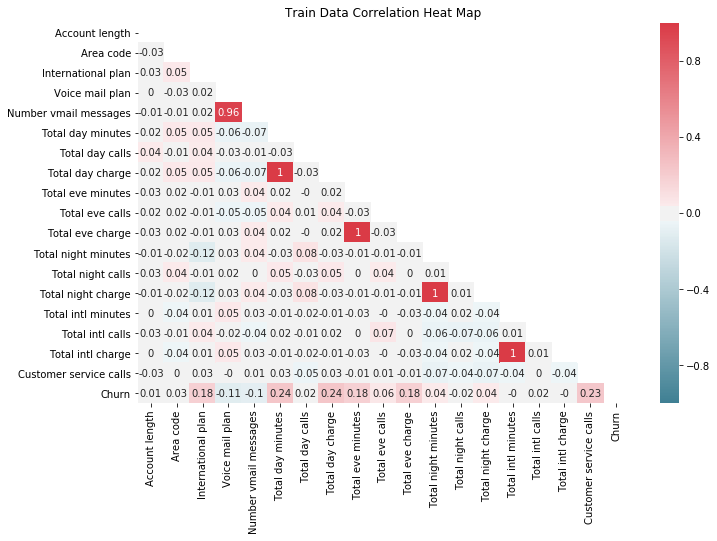

In [27]:
# Plot a heatmap to see correlations in numbers.
def correlation_heat_map(df):
    corrs = round(df.corr(), 2)

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11,7))

    # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with Seaborn.
    # Assign the matplotlib axis the function returns. This allow us to resize the labels.
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(corrs, annot=True, mask=mask, cmap=cmap, vmin=-1, vmax=1)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, rotation=0)

    plt.title('Train Data Correlation Heat Map')
    
correlation_heat_map(df)

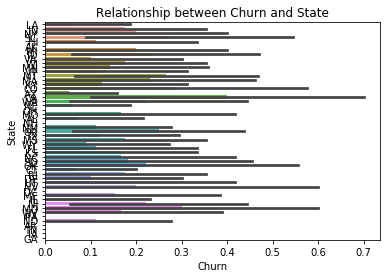

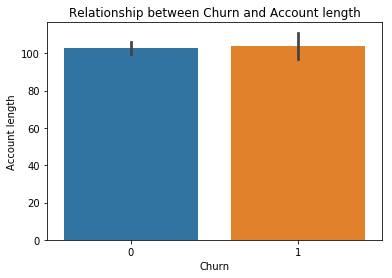

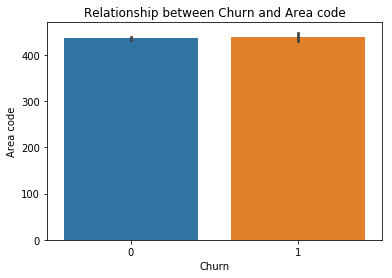

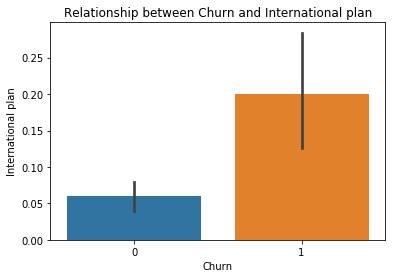

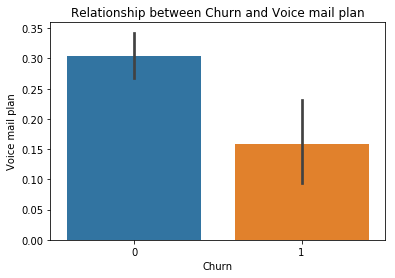

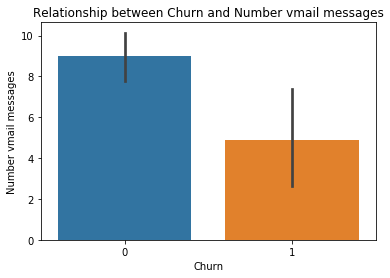

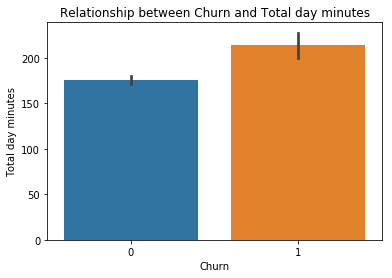

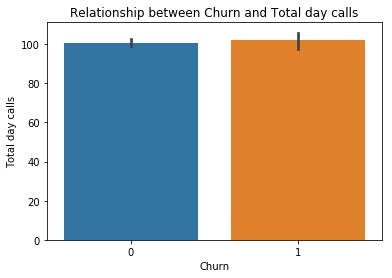

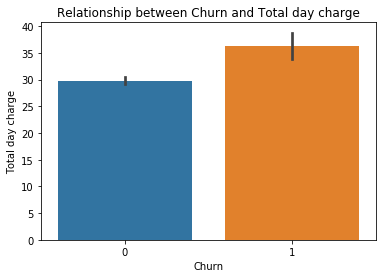

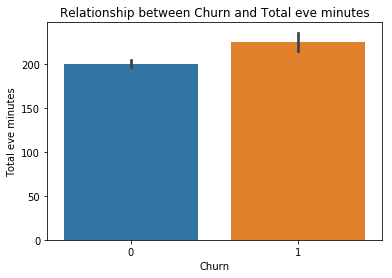

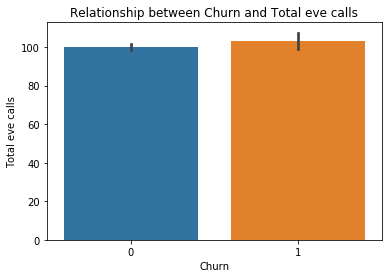

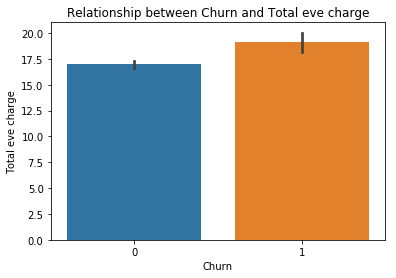

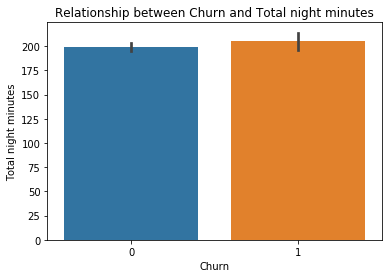

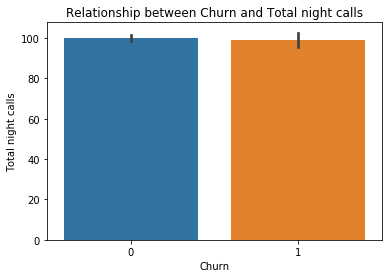

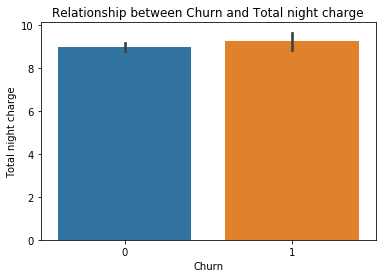

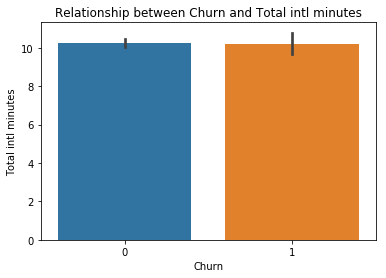

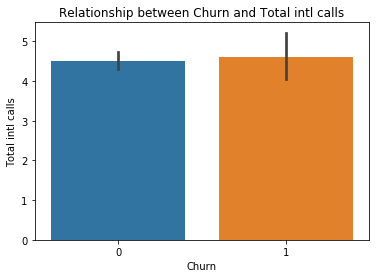

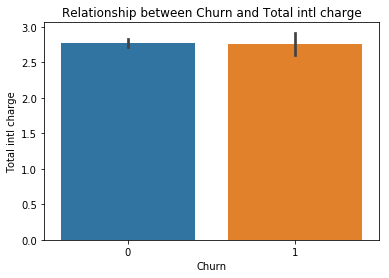

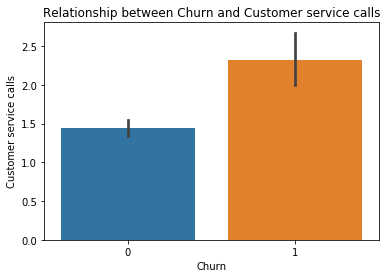

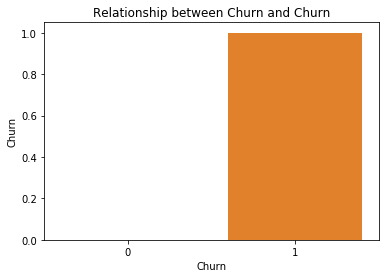

In [11]:
plot_columns = df.columns

for i in plot_columns:
    sns.barplot(x=df['Churn'],
                y=df[i]).set(title=f'Relationship between Churn and {i}')
    plt.show();
    print

<a id='Modeling'></a>
# Modeling

<a id='Baseline'></a>
## Baseline

In [12]:
# Baseline accuracy
baseline = 1-(df['Churn'].mean())
print('Baseline Accuracy:', baseline)

Baseline Accuracy: 0.8575712143928036


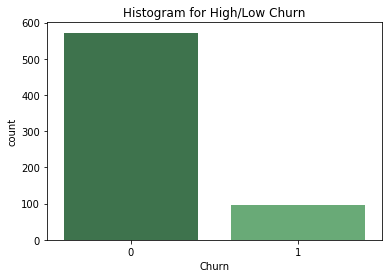

In [13]:
# Plot a bargraph to compare churn
ax = plt.axes()
sns.countplot(x="Churn", data=df, palette="Greens_d")
ax.set_title('Histogram for High/Low Churn')
ax.legend()
plt.show();

<a id='Logistic Regression'></a>
# Logistic Regression

In [14]:
X = df[['Customer service calls', 'Total eve charge', 'Total eve minutes',
        'Total day charge', 'Total day minutes', 'International plan',
        'Voice mail plan', 'Number vmail messages']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

logreg1 = LogisticRegression()
logreg1.fit(X_train, y_train)

score = logreg1.score(X_test, y_test)
cvs = cross_val_score(logreg1, X_test, y_test, cv=5).mean()

print('Baseline Accuracy:', baseline)
print('1st Logistic Regression Model Score with Subreddit Feature:', score)
print('1st Logistic Regression 5 Folds Cross-Validation Score:', cvs)

Baseline Accuracy: 0.8575712143928036
1st Logistic Regression Model Score with Subreddit Feature: 0.8892215568862275
1st Logistic Regression 5 Folds Cross-Validation Score: 0.880189959294437


In [15]:
X = df[['Customer service calls', 'Total eve charge', 'Total eve minutes',
        'Total day charge', 'Total day minutes', 'International plan',
        'Voice mail plan', 'Number vmail messages']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
 
params_grid = {'penalty': ['l1', 'l2'],
               'C': [.001, .1, 1.0, 10.0]}

gs = GridSearchCV(logreg1, params_grid, verbose=1, cv=5)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.1, 1.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [16]:
best_logreg = gs.best_estimator_
best_score = best_logreg.score(X_test, y_test)
cvs = cross_val_score(best_logreg, X_test, y_test, cv=5).mean()

print('Best Logistic Regression Estimator:\n\t', best_logreg)
print('Logistic Regression Best Score:', best_score)
print('5 folds Cross-Validation Score:', cvs)

Best Logistic Regression Estimator:
	 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Logistic Regression Best Score: 0.8592814371257484
5 folds Cross-Validation Score: 0.8533242876526458


<a id='Random Forest Classifier'></a>
# Random Forest Classifier

In [17]:
X = df[['Customer service calls', 'Total eve charge', 'Total eve minutes',
        'Total day charge', 'Total day minutes', 'International plan',
        'Voice mail plan', 'Number vmail messages']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

scaler = StandardScaler()  
scaler.fit(X_train)

rand_forest1 = RandomForestClassifier()
rand_forest1.fit(X_train, y_train)


score = rand_forest1.score(X_test, y_test)
cvs = cross_val_score(rand_forest1, X_test, y_test, cv=5).mean()

print('Baseline Accuracy:', baseline)
print('1st Random Forest Model Score with Subreddit:', score)
print('1st Random Forest 5 Folds Cross-Validation Score:', cvs)

Baseline Accuracy: 0.8575712143928036
1st Random Forest Model Score with Subreddit: 0.9221556886227545
1st Random Forest 5 Folds Cross-Validation Score: 0.8951153324287653


In [18]:
X = df[['Customer service calls', 'Total eve charge', 'Total eve minutes',
        'Total day charge', 'Total day minutes', 'International plan',
        'Voice mail plan', 'Number vmail messages']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

scaler = StandardScaler()  
scaler.fit(X_train)
 
params_grid = {'n_estimators': [10, 20, 30],
               'max_features': ['auto', 'log2', 'sqrt'],
               'n_jobs': [-1],
               'verbose': [1]}

gs = GridSearchCV(rand_forest1, params_grid, verbose=1, cv=5)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_job

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | 

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30], 'max_features': ['auto', 'log2', 'sqrt'], 'n_jobs': [-1], 'verbose': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [19]:
best_rand_forest = gs.best_estimator_
best_score = best_rand_forest.score(X_test, y_test)
cvs = cross_val_score(best_rand_forest, X_test, y_test, cv=5).mean()

print('Best RandomForest Regression Estimator:\n\t', best_rand_forest)
print('RandomForest Best Score:', best_score)
print('5 folds Cross-Validation Score:', cvs)

[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


Best RandomForest Regression Estimator:
	 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)
RandomForest Best Score: 0.9191616766467066
5 folds Cross-Validation Score: 0.9042062415196744


[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished


<a id='Feature Importances'></a>
# Feature Importances

In [20]:
feat = pd.DataFrame(rand_forest1.feature_importances_, columns=["importance"])
feat["labels"] = ['Customer service calls', 'Total eve charge', 'Total eve minutes',
                  'Total day charge', 'Total day minutes', 'International plan',
                  'Voice mail plan', 'Number vmail messages']
feat.sort_values("importance", inplace=True, ascending=False)
display(feat.head(10))

,importance,labels
3,0.221782,Total day charge
4,0.189708,Total day minutes
1,0.182452,Total eve charge
0,0.132937,Customer service calls
2,0.121719,Total eve minutes
7,0.084677,Number vmail messages
5,0.045169,International plan
6,0.021555,Voice mail plan
